In [1]:
import sys
sys.path.append("../")
from models.estimators.ising import IsingPathEstimator
from utils import ProgressBar
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Mean Field Ising Model
- $\mathcal{X} = \{-1,+1\}^D$ and $M(x) = \sum_{d=1}^D x_d$

$$ p(\sigma \;|\; \alpha) \propto \exp\Big(\frac{\alpha}{D} M(x)^2\Big)$$

- $D=100$
- $\alpha=3.0$
- Tempered path from the uniform distribution to the target

In [2]:
ipe = IsingPathEstimator(100, 3.0)

### Estimate the energy manifold

In [3]:
np.random.seed(1337)
ipe.fit_energy_map(N=10**2, n_beta=11, verbose=False)

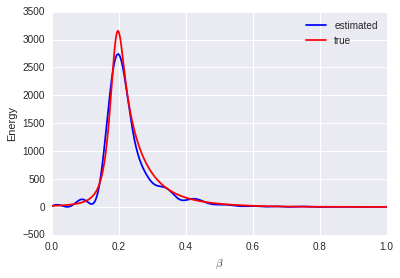

In [4]:
ipe.plot_energy_map()
ipe.plot_true_energy_map()
plt.legend()
plt.show()

### Find the optimal path
- Grid of 500 (inverse) temperatures between 0 and 1
- Allowed a max step size of 100

In [5]:
grid_sizes = [500]
directions = ['forward']
max_strides = [100]
ipe.generate_weighted_graph(grid_sizes, directions, max_strides, 0.1)

In [41]:
uniform_path = ipe.uniform_path(10)
weighted_path = ipe.weighted_path(len(uniform_path))
linear_path = ipe.linear_path(len(uniform_path))

103


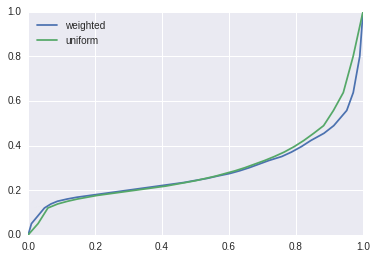

In [7]:
plt.plot(np.linspace(0,1,len(weighted_path)), weighted_path, label='weighted')
plt.plot(np.linspace(0,1,len(uniform_path)), uniform_path, label='uniform')
plt.legend(loc='upper left')
print len(uniform_path)
plt.show()

## Sampling diagnostics from various paths
Diagnostics include 
- Probability of each mode
- Effective sample size
- Total

#### uniform path

In [8]:
uniform_output = ipe.sampling(uniform_path, 500)

% complete:  1 4 7 10 13 16 19 22 25 28 31 34 37 40 43 46 49 52 55 58 61 64 67 70 73 76 79 82 85 88 91 94 97 100 
Elapsed time: 100.9 seconds.


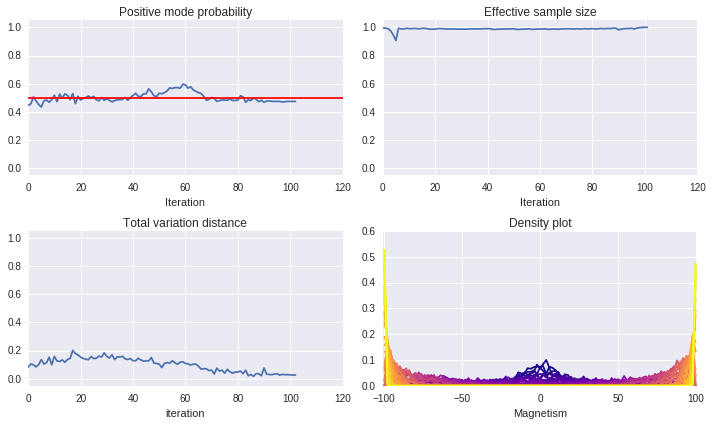

In [9]:
ipe.plot_diagnostics(uniform_output, uniform_path)

#### weighted path

In [10]:
weighted_output = ipe.sampling(weighted_path, 500)

% complete:  1 4 7 10 13 16 19 22 25 28 31 34 37 40 43 46 49 52 55 58 61 64 67 70 73 76 79 82 85 88 91 94 97 
Elapsed time: 98.9 seconds.


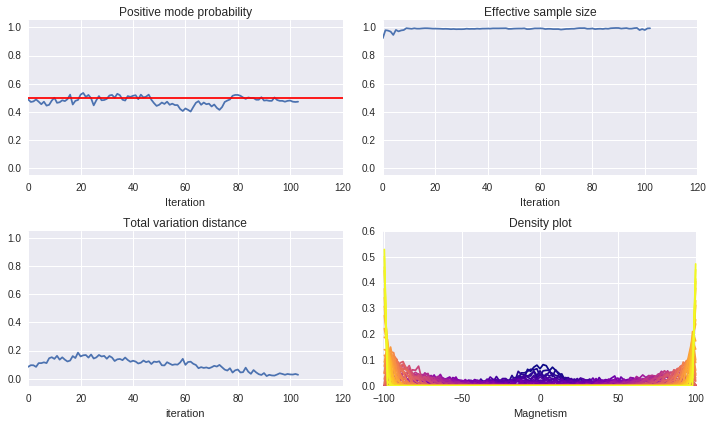

In [11]:
ipe.plot_diagnostics(weighted_output, weighted_path)

#### linear path

In [12]:
linear_output = ipe.sampling(linear_path, 500)

% complete:  1 4 7 10 13 16 19 22 25 28 31 34 37 40 43 46 49 52 55 58 61 64 67 70 73 76 79 82 85 88 91 94 97 100 
Elapsed time: 96.1 seconds.


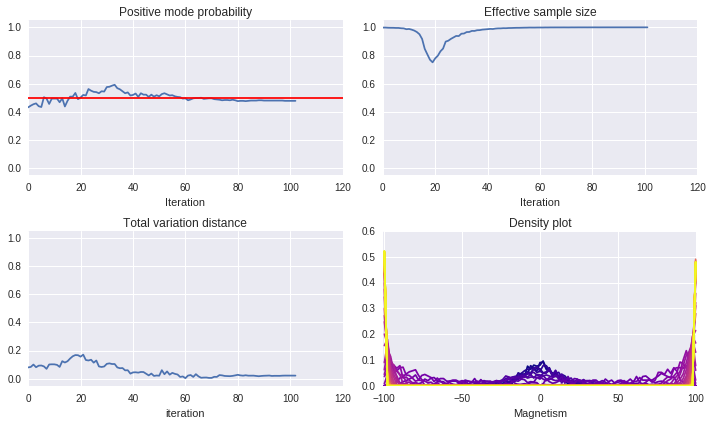

In [13]:
ipe.plot_diagnostics(linear_output, linear_path)

## Estimates of the normalizing constant

- 50 experiments for each path type
- Each path had length of 300
- 50 samples used at each step

In [42]:
n_estimates = 50
n_samples = 50

In [43]:
uniform_ests = []
pb = ProgressBar(n_estimates)
for n in range(n_estimates):
    uniform_ests.append(ipe.estimate_lambda(uniform_path, N=n_samples, verbose=False))
    pb.increment()
pb.finish()

% complete:  4 10 16 22 28 34 40 46 52 58 64 70 76 82 88 94 100 
Elapsed time: 8023.8 seconds.


In [44]:
weighted_ests = []
pb = ProgressBar(n_estimates)
for n in range(n_estimates):
    weighted_ests.append(ipe.estimate_lambda(weighted_path, N=n_samples, verbose=False))
    pb.increment()
pb.finish()

% complete:  4 10 16 22 28 34 40 46 52 58 64 70 76 82 88 94 100 
Elapsed time: 7790.4 seconds.


In [45]:
linear_ests = []
pb = ProgressBar(n_estimates)
for n in range(n_estimates):
    linear_ests.append(ipe.estimate_lambda(linear_path, N=n_samples, verbose=False))
    pb.increment()
pb.finish()

% complete:  4 10 16 22 28 34 40 46 52 58 64 70 76 82 88 94 100 
Elapsed time: 7799.2 seconds.


## Results

Uniform Best path variance: 0.084

Weighted Best path variance: 0.086

Linear path variance: 0.142



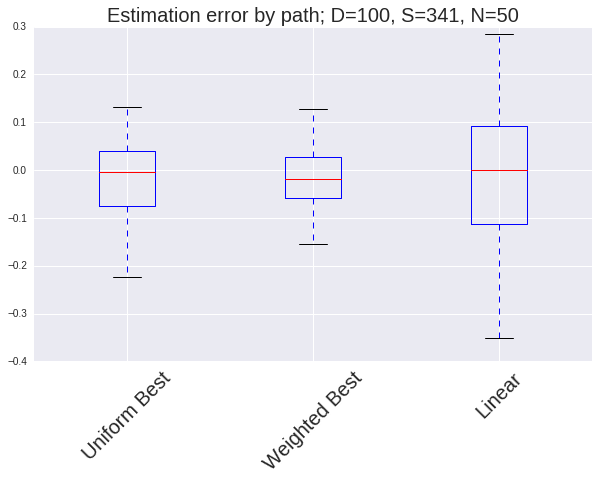

In [46]:
errors = [
    np.array(uniform_ests)-ipe.true_lambda(),
    np.array(weighted_ests)-ipe.true_lambda(),
    np.array(linear_ests)-ipe.true_lambda()
]

path_names = ['Uniform Best', 'Weighted Best', 'Linear']

for i, variance in enumerate(np.array(errors).var(1)):
    print '{0} path variance: {1:.3f}\n'.format(path_names[i], variance**0.5)
    
plt.boxplot(errors)
plt.xticks([1,2,3], path_names, rotation=45, fontsize=20)
plt.title(
    'Estimation error by path; D={}, S={}, N={}'.format(ipe.dimension, len(uniform_path), n_estimates),
    fontsize=20         
)
plt.show()